In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [2]:
df_train = pd.read_csv("Metro_Interstate_Traffic_Volume_train.csv")
df_test = pd.read_csv("Metro_Interstate_Traffic_Volume_test.csv")

In [3]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [4]:
df.sample(5)

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,year,month,day,hour,traffic_volume
24218,24218,NaN,291.56,0.00,0.0,0,Clear,Sky is Clear,2016-06-16 00:00:00,2016,6,16,00:00,775
18770,18770,NaN,278.49,0.00,0.0,1,Clear,sky is clear,2015-10-04 08:00:00,2015,10,4,08:00,2202
12799,12799,NaN,278.58,0.00,0.0,90,Clouds,overcast clouds,2014-03-09 19:00:00,2014,3,9,19:00,3230
34980,34980,NaN,294.81,0.00,0.0,1,Rain,moderate rain,2017-06-30 18:00:00,2017,6,30,18:00,3988
47940,47940,NaN,291.83,0.25,0.0,90,Rain,light rain,2018-09-20 23:00:00,2018,9,20,23:00,1633


In [5]:
df.describe()

,Unnamed: 0,temp,rain_1h,snow_1h,clouds_all,year,month,day,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,24101.500000,281.205870,0.334264,0.000222,49.362231,2015.512426,6.506037,15.737636,3259.818355
std,13915.440525,13.338232,44.789133,0.008168,39.015750,1.893211,3.400221,8.722938,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,12050.750000,272.160000,0.000000,0.000000,1.000000,2014.000000,4.000000,8.000000,1193.000000
50%,24101.500000,282.450000,0.000000,0.000000,64.000000,2016.000000,7.000000,16.000000,3380.000000
75%,36152.250000,291.806000,0.000000,0.000000,90.000000,2017.000000,9.000000,23.000000,4933.000000
max,48203.000000,310.070000,9831.300000,0.510000,100.000000,2018.000000,12.000000,31.000000,7280.000000


In [6]:
df.isnull().sum().any()

True

In [7]:
df.isnull().sum()

Unnamed: 0                 0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
year                       0
month                      0
day                        0
hour                       0
traffic_volume             0
dtype: int64

In [8]:
df['holiday'].fillna('not a holiday', inplace=True)

In [9]:
df.isnull().sum().any()

False

In [10]:
object_columns = df.select_dtypes(include=['object']).columns

print(object_columns)

Index(['holiday', 'weather_main', 'weather_description', 'date_time', 'hour'], dtype='object')


In [11]:
df = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description', 'date_time', 'hour'], drop_first=True)

In [12]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


In [13]:
y = df['traffic_volume']
X = df.drop(["traffic_volume"], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.02009115478727308
R-squared (R2): 0.7306701894491048


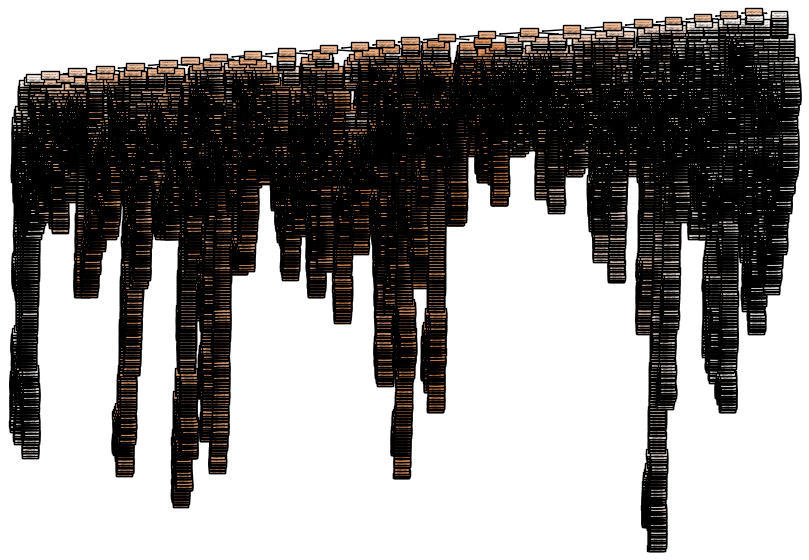

In [31]:
fig=plt.figure(figsize=(10,7))
plot_tree(clf, filled=True)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42) 
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [17]:
y_pred = rf_regressor.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [19]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.015181899100603684
R-squared (R2): 0.7964806875531828


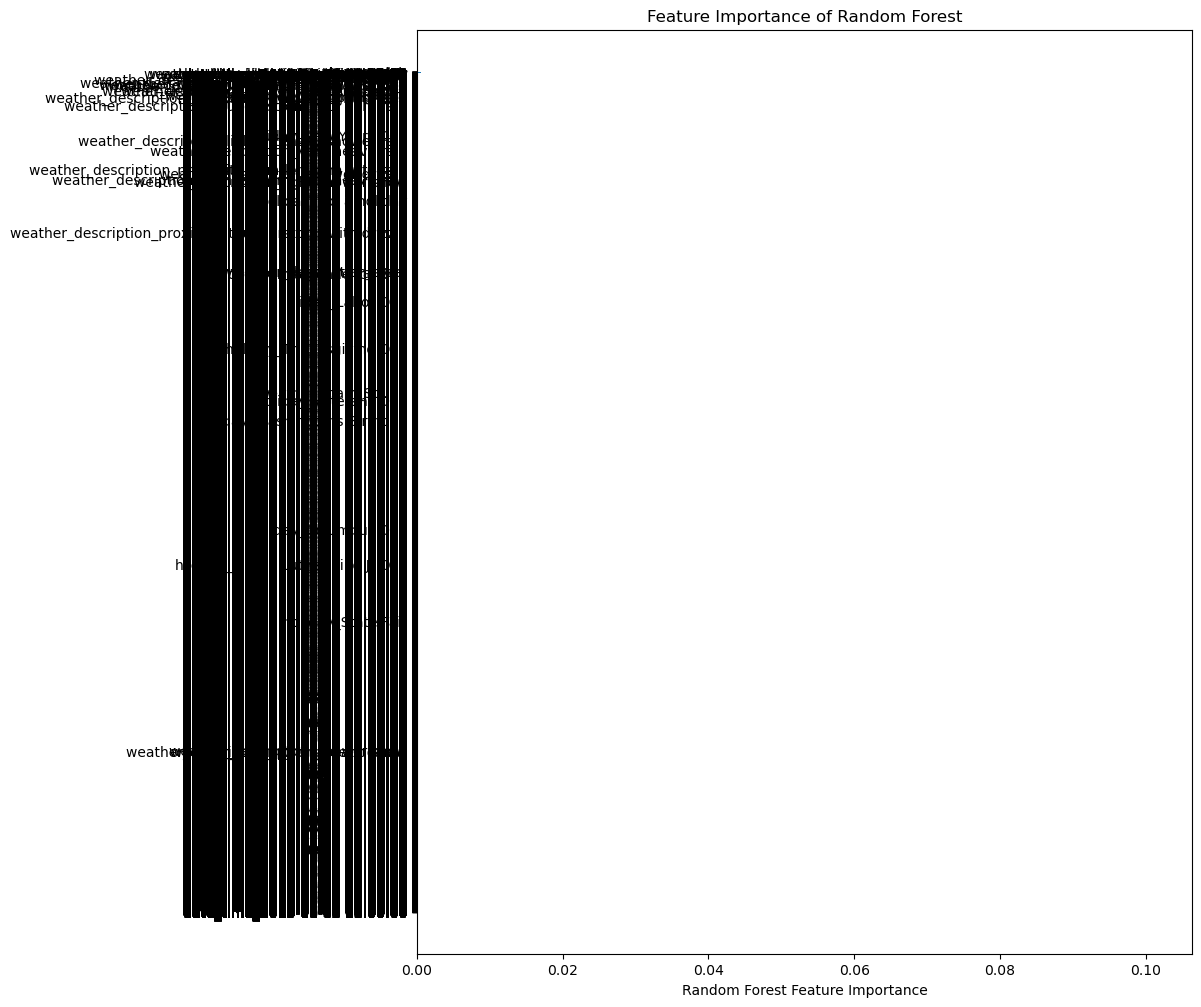

In [20]:
feature_importances = rf_regressor.feature_importances_

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance of Random Forest")
plt.show()